from https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset/code

In [187]:
import pandas as pd

In [188]:
df=pd.read_csv('twitter_MBTI.csv')
df.head()

,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


(7811, 3)


<AxesSubplot:>

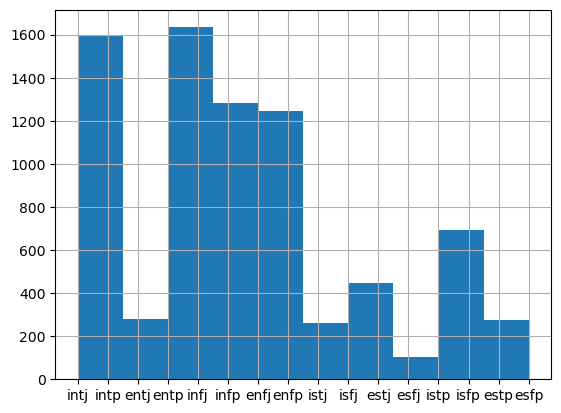

In [189]:
print(df.shape)
df.label.hist()

In [190]:
# nb each text contains multiple tweets seperated with ||| Was going to burst these, but don'tthink it adds value
# but definitely works removing @handles, and urls (probably)
import re
def rmhand(s):
    return re.sub('@[^\s]*','',s)
def rmurl(s):
    return re.sub('https://[^\s]*','',s)
def rmtags(s):
    return re.sub('#','',s)
def rmpipes(s):
    return re.sub('\|\|','',s)

def clean_tweets(s):
    s=s.apply( rmhand )
    s=s.apply(rmurl)
    s=s.apply(rmtags)
    s=s.apply(rmpipes)
    s=s.apply(lambda x:x.lower())
    return s
test=pd.Series(['xxx @yz zzz','start https://spug end || more'])
clean_tweets(test)
df.text=clean_tweets(df.text)

['intj' 'intp' 'entj' 'entp' 'infj' 'infp' 'enfj' 'enfp' 'istj' 'isfj'
 'estj' 'esfj' 'istp' 'isfp' 'estp' 'esfp']
intj (81, 3)
intp (161, 3)
entj (241, 3)
entp (321, 3)
infj (401, 3)
infp (481, 3)
enfj (561, 3)
enfp (641, 3)
istj (721, 3)
isfj (801, 3)
estj (881, 3)
esfj (961, 3)
istp (1041, 3)
isfp (1121, 3)
estp (1201, 3)
esfp (1281, 3)


<AxesSubplot:>

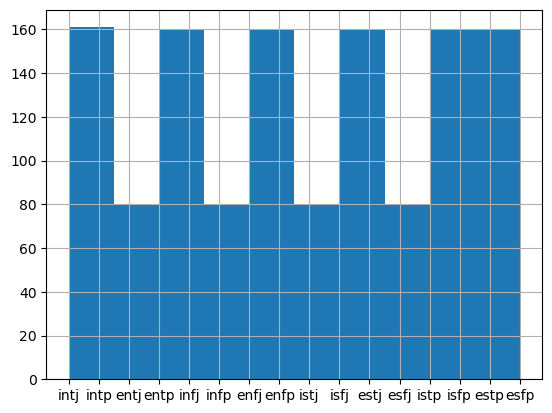

In [191]:
# get fully balanced sample
# firstly get labels
types=df.label.unique()
print(types)
# then get nsamp of each
nsamp=80
t='intj'
df.query('label=="'+t+'"')
working_df=df.head(1)
for t in types:    
    working_df=pd.concat([working_df,df.query('label=="'+t+'"').sample(nsamp)])
    print(t,working_df.shape)
# clean it
working_df.text=clean_tweets(working_df.text)
working_df.label.hist()  
    

In [192]:
# rename our data so I can copy paste mueller code
# bards_words=working_df.text

In [193]:
# pp 35
# from sklearn.feature_extraction.text import CountVectorizer
# vect=CountVectorizer()

In [194]:
# vect.fit(working_df.text)
# print(f"size {len(vect.vocabulary_)}")

In [195]:
#print(f"content {vect.vocabulary_}")

In [196]:
# bag_of_words = vect.transform(bards_words)
# print("bag_of_words: {}".format(repr(bag_of_words)))

In [197]:
# print("Dense representation of bag_of_words:\n{}".format(
#     bag_of_words.toarray()))

In [198]:
# rescale with tf-idf
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5, stop_words='english',ngram_range=(1,1),norm=None).fit(working_df.text)
X = vectorizer.transform(working_df.text)
y=working_df.label
# find maximum value for each of the features over dataset:
max_value = X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())
print(f'{len(feature_names)} features')
print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-40:]]))

13155 features
Features with lowest tfidf:
['masterpiece' 'humor' 'finishing' 'attitude' 'illness' 'cancel'
 'guessing' 'definition' 'screamed' 'believed' 'sooner' 'runs' 'kicking'
 'tim' 'receiving' 'blocking' '2am' 'drawn' 'exposed' 'square']
Features with highest tfidf: 
['matter' '11' 'poetry' 'happens' 'recognition' 'amp' '2022' 'order'
 'omori' 'comment' 'soobin' 'pre' 'seventeen' 'taehyun' 'peer' '05' 'nct'
 'lee' 'selling' '12' '세븐틴' 'aye' 'sector' 'ka' 'nintendoswitch' 'exo'
 '04' 'vote' '06' 'photography' 'shiny' 'tae' 'enhypen' 'shopee' 'wordle'
 'loveisland' 'artwork' '22' 'kst' '07']


In [199]:
from sklearn.model_selection import train_test_split
# setup for fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [200]:
# vect = CountVectorizer().fit(text_train)
# X_train = vect.transform(text_train)
# print("X_train:\n{}".format(repr(X_train)))

In [201]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 76702
First 20 features:
['00', '000', '0000', '00000', '000001', '00005', '0001', '0001891', '0002thinker', '000kg', '001', '0019', '002', '002137100020', '006323', '0069', '007', '00am', '00l', '00pm']
Features 20010 to 20030:
['emo', 'emogworl', 'emoj', 'emoji', 'emojimons', 'emojis', 'emos', 'emosi', 'emote', 'emotes', 'emoti', 'emoticon', 'emoticons', 'emotinal', 'emotion', 'emotional', 'emotionalinclusion', 'emotionally', 'emotionless', 'emotions']
Every 2000th feature:
['00', 'aarhi', 'aman', 'auditions', 'berdua', 'brownie', 'chasm', 'consistency', 'dayyyyssssss', 'dlcs', 'emmanuel', 'fasted', 'fuckvhgjtb', 'gorgeousss', 'hayek', 'humans', 'intramurals', 'julien', 'konnichiwa', 'literallyyyy', 'manman', 'misi', 'namu', 'oats', 'paligoy', 'plotinian', 'qs', 'reveal', 'schadenfreude', 'shyt', 'sp5', 'supportive', 'theorised', 'tumawa', 'veranda', 'willllllllllllllllllllllllllllllllllllllllllllllllll', 'youdvsgfz', 'অন', '완전']


/home/johnc/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [202]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier # 0.38
from sklearn.neighbors import KNeighborsClassifier # brutal
from sklearn.neural_network import MLPClassifier # poor 0.12
from sklearn.ensemble import RandomForestClassifier # 0.4
from sklearn.metrics import classification_report
#scores = cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, cv=2)
#print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
reg=RandomForestClassifier().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(classification_report(y_pred,y_test,target_names=types))

              precision    recall  f1-score   support

        intj       0.36      0.38      0.37        26
        intp       0.24      0.53      0.33        15
        entj       0.43      0.23      0.30        44
        entp       0.44      0.61      0.51        23
        infj       0.41      0.26      0.32        34
        infp       0.32      0.15      0.21        46
        enfj       0.30      0.37      0.33        19
        enfp       0.50      0.41      0.45        29
        istj       0.57      0.77      0.65        22
        isfj       0.29      0.38      0.33        21
        estj       0.43      0.38      0.41        26
        esfj       0.50      0.48      0.49        25
        istp       0.58      0.36      0.44        39
        isfp       0.48      0.57      0.52        23
        estp       0.24      0.54      0.33        13
        esfp       0.42      0.72      0.53        18

    accuracy                           0.40       423
   macro avg       0.41   

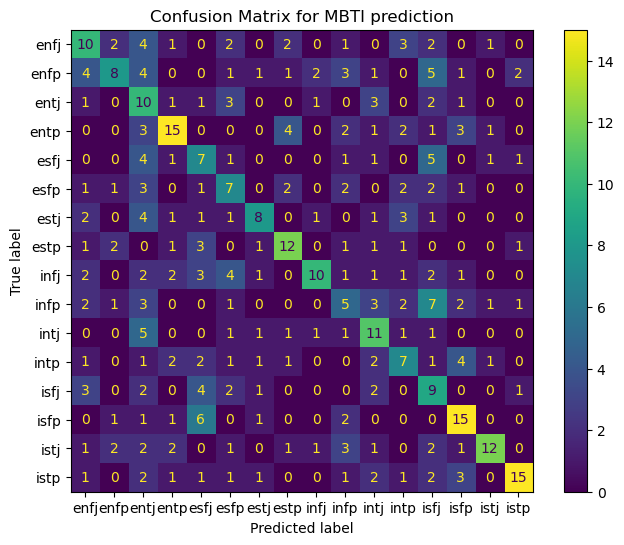

In [172]:
from sklearn.metrics import confusion_matrix

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=reg.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for MBTI prediction')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);